## Breast Cancer Prediction

### Data Preparation

In [266]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
from sklearn import preprocessing
import time

In [267]:
df = pd.read_csv('data.csv')

In [268]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [269]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

I need to drop the last column and change diagnosis into numeric values

In [270]:
df = df[df.columns[:-1]]
df['diagnosis'] = [0 if x == 'M' else 1 for x in df['diagnosis']]
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


diagnosis
0    212
1    357
dtype: int64


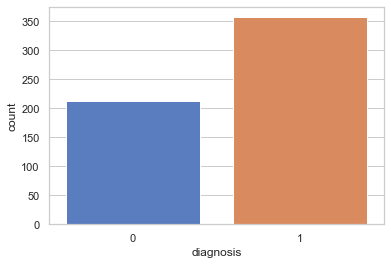

In [271]:
Y = df.diagnosis
X = df.iloc[:,2:]
print(df.groupby(['diagnosis']).size())       # M = 212, B = 357
ax = sns.countplot(Y,label="Count")

Standardize the data

In [272]:
X=(X-X.mean())/X.std()
data = pd.concat([Y,X],axis=1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,0,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,0,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,0,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,0,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


### EDA

In [273]:
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

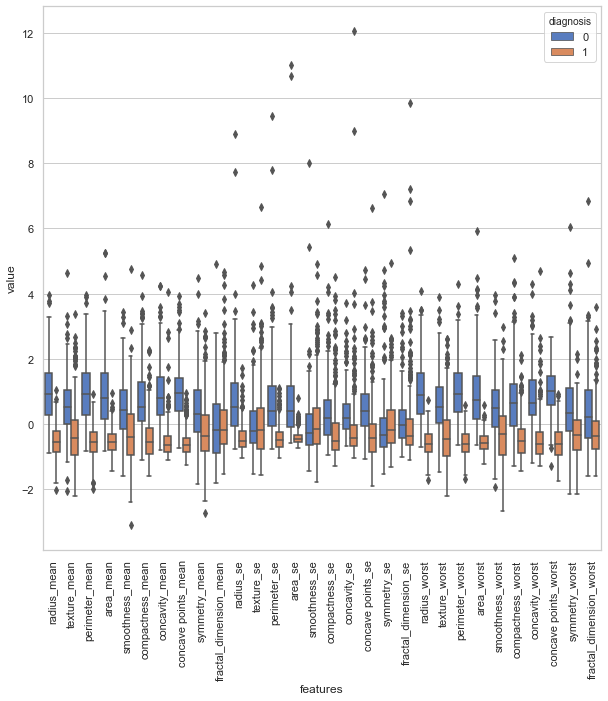

In [274]:
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)


## Correlation map

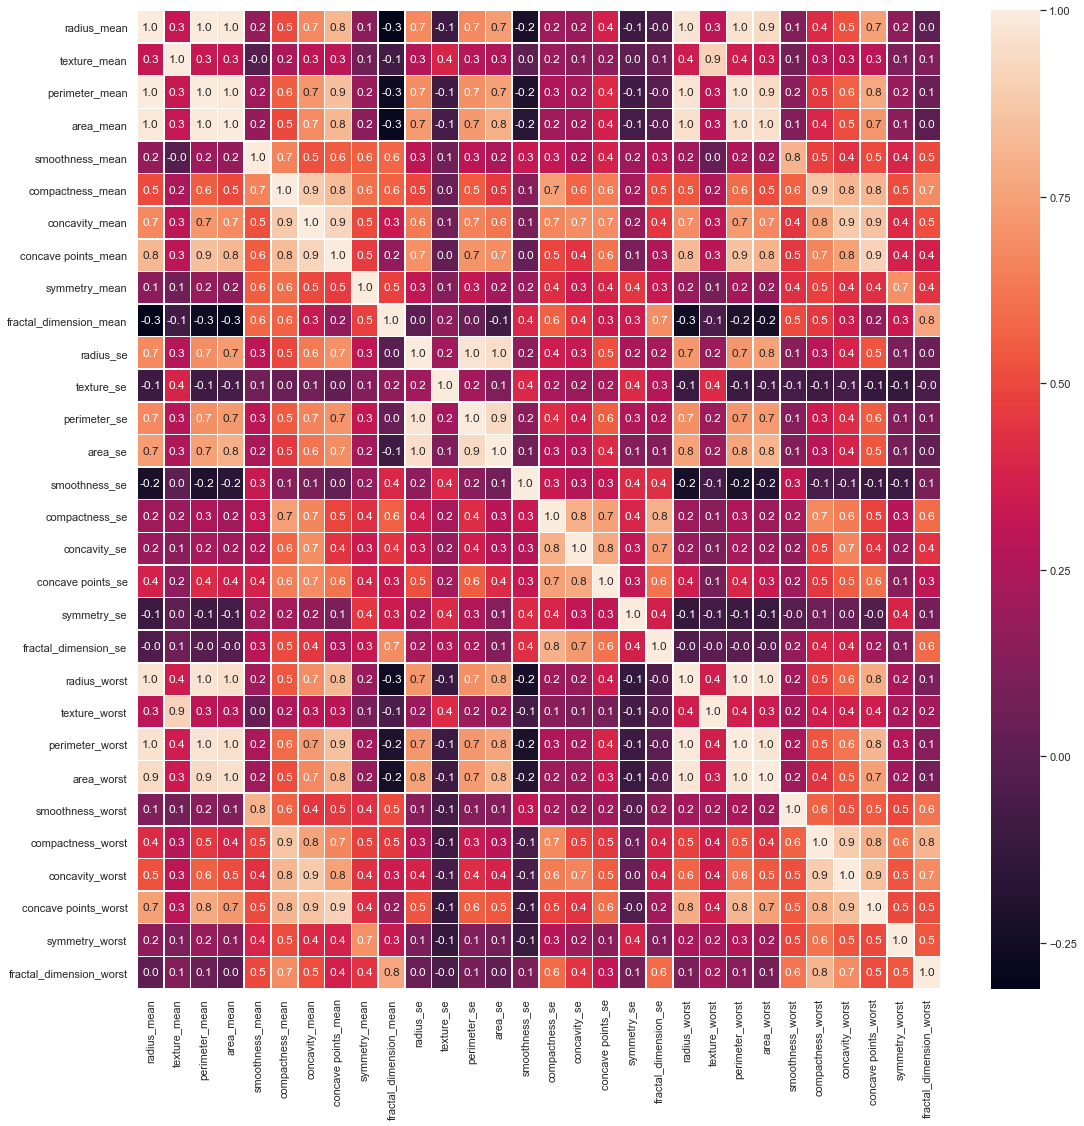

In [275]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

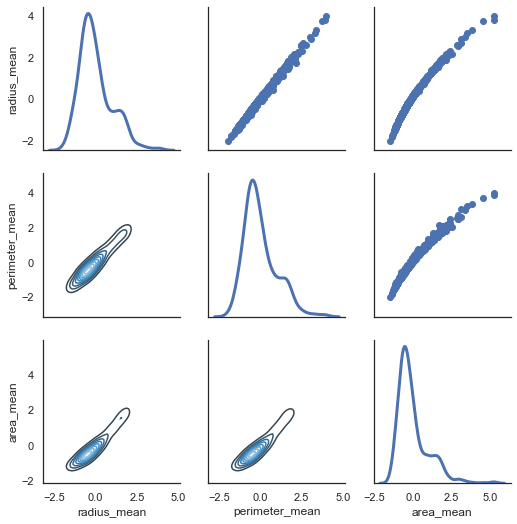

In [276]:
sns.set(style="white")
df = X.loc[:,['radius_mean','perimeter_mean','area_mean']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)


As it can be seen in map heat figure radius_mean, perimeter_mean and area_mean are correlated with each other so we will use only area_mean

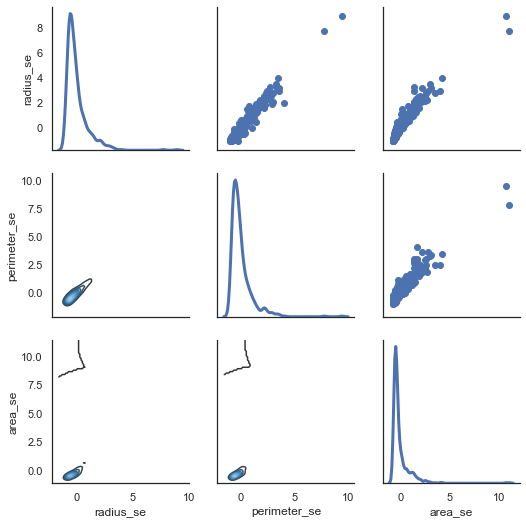

In [277]:
sns.set(style="white")
df = X.loc[:,['radius_se','perimeter_se','area_se']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

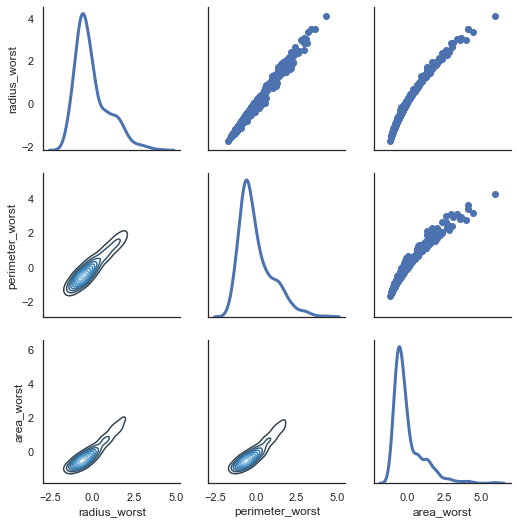

In [278]:
sns.set(style="white")
df = X.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

In [281]:
drop_list = ['perimeter_mean','area_mean','compactness_mean','concave points_mean','radius_se','area_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','radius_worst']
X_select = X.drop(drop_list,axis = 1 )        # do not modify x, we will use it later 
X_select.head()

,radius_mean,texture_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,perimeter_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,area_worst,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1.096100,-2.071512,1.567087,2.650542,2.215566,2.253764,-0.564768,2.830540,-0.213814,0.723390,1.147747,0.906286,1.999478,1.306537,2.107672,2.748204,1.935312
1,1.828212,-0.353322,-0.826235,-0.023825,0.001391,-0.867889,-0.875473,0.263095,-0.604819,-0.440393,-0.804742,-0.099356,1.888827,-0.375282,-0.146620,-0.243675,0.280943
2,1.578499,0.455786,0.941382,1.362280,0.938859,-0.397658,-0.779398,0.850180,-0.296744,0.212889,0.236827,0.293301,1.455004,0.526944,0.854222,1.151242,0.201214
3,-0.768233,0.253509,3.280667,1.914213,2.864862,4.906602,-0.110312,0.286341,0.689095,0.818798,4.728520,2.045711,-0.549538,3.391291,1.987839,6.040726,4.930672
4,1.748758,-1.150804,0.280125,1.369806,-0.009552,-0.561956,-0.789549,1.272070,1.481763,0.827742,-0.360775,0.498889,1.219651,0.220362,0.612640,-0.867590,-0.396751


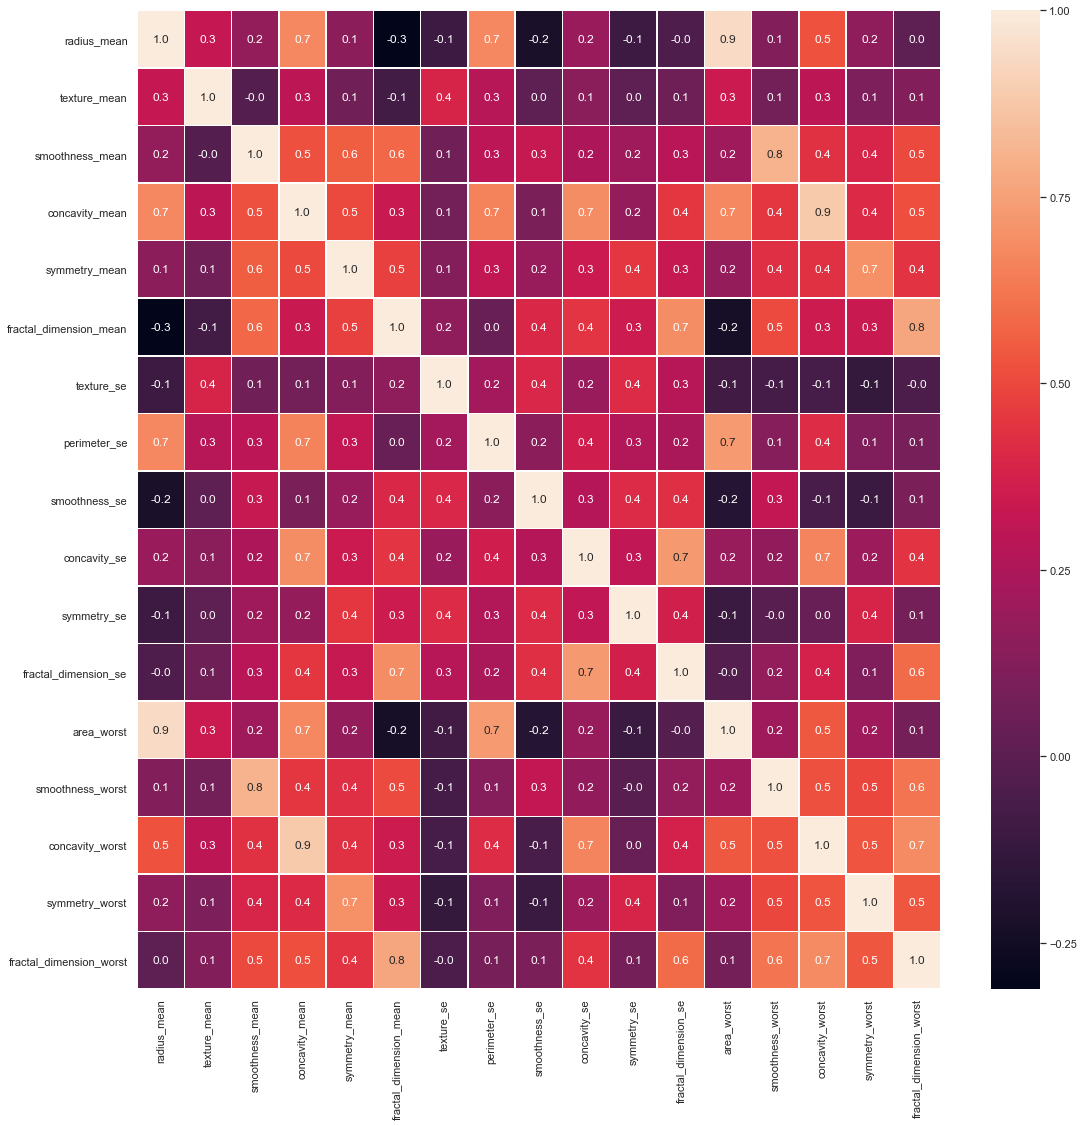

In [282]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X_select.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

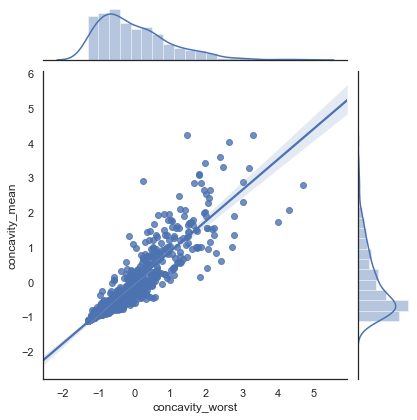

In [230]:
sns.jointplot(X.loc[:,'concavity_worst'], X.loc[:,'concavity_mean'], kind="regg")

In [ ]:
sns.jointplot(X.loc[:,'radius_mean'], X.loc[:,'area_wors'], kind="regg")

In [263]:
X_select = X_select.drop(['concavity_mean'],axis = 1 )        # do not modify x, we will use it later 
len(X_select.iloc[0,])

15

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

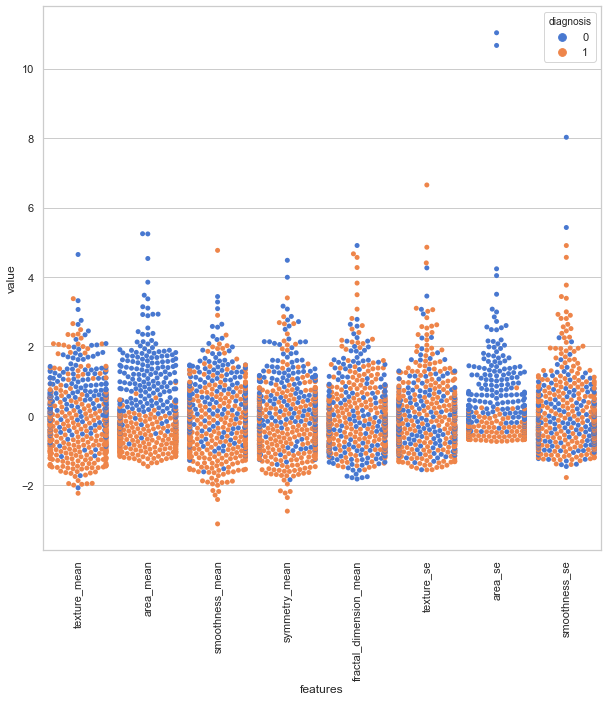

In [264]:
sns.set(style="whitegrid", palette="muted")
data_dia = Y
data = X_select
data = pd.concat([Y,X_select.iloc[:,0:8]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

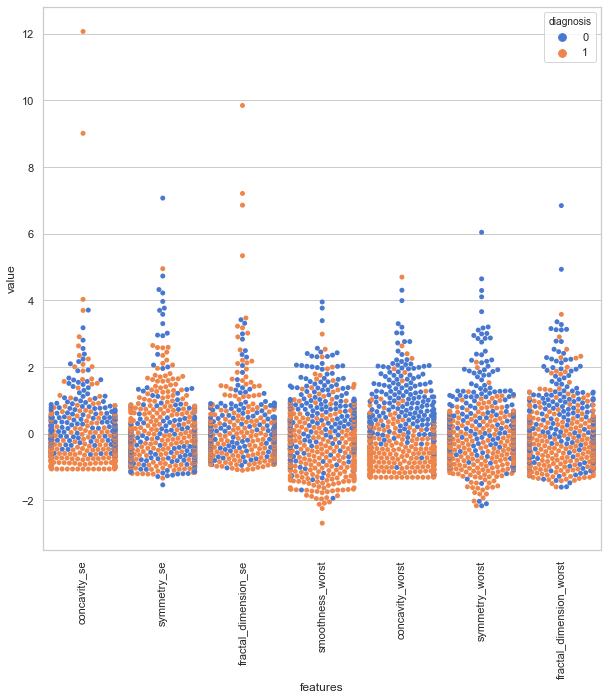

In [265]:
sns.set(style="whitegrid", palette="muted")
data_dia = Y
data = X_select
data = pd.concat([Y,X_select.iloc[:,8:]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

## Scaling the data

In [155]:
from sklearn import preprocessing
names = X_select.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_X = scaler.fit_transform(X_select)
scaled_X = pd.DataFrame(scaled_X, columns=names)
scaled_X.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,-2.073335,0.984375,1.568466,2.652874,2.217515,2.255747,-0.565265,2.487578,-0.214002,0.724026,1.148757,0.907083,1.307686,2.109526,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.023846,0.001392,-0.868652,-0.876244,0.742402,-0.605351,-0.440780,-0.805450,-0.099444,-0.375612,-0.146749,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.363478,0.939685,-0.398008,-0.780083,1.181336,-0.297005,0.213076,0.237036,0.293559,0.527407,0.854974,1.152255,0.201391
3,0.253732,-0.764464,3.283553,1.915897,2.867383,4.910919,-0.110409,-0.288378,0.689702,0.819518,4.732680,2.047511,3.394275,1.989588,6.046041,4.935010
4,-1.151816,1.826229,0.280372,1.371011,-0.009560,-0.562450,-0.790244,1.190357,1.483067,0.828471,-0.361092,0.499328,0.220556,0.613179,-0.868353,-0.397100


## Set up training and testing dataset

In [162]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled_X, Y)

## Logistic Regression in 5 fold cross validation

In [167]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

kfold = KFold(n_splits=5)
logreg = LogisticRegression().fit(x_train, y_train)

print("LOGISTIC REGRESSION (SCALED DATA)")
print("Training set score: {:.3f}".format(logreg.score(x_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(x_test, y_test))) 

# Kfold Cross Validation
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(logreg, x_train, y_train, cv=kfold))))

# Wine type prediction from test set (I'll use this later)
logreg_predicted_vals = logreg.predict(x_test)

# # Organize the model coefficients
logreg_coef = pd.DataFrame(data=logreg.coef_, columns=X_select.columns, index=['Logistic Regression Coefficients'])
logreg_coef.head()

LOGISTIC REGRESSION (SCALED DATA)
Training set score: 0.981
Test set score: 0.979
Mean Cross Validation, KFold: 0.969


,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
Logistic Regression Coefficients,-1.08633,-2.02146,-0.465874,-1.530551,0.056576,1.105028,-0.255067,-2.603959,-0.178446,0.52246,0.642137,0.559504,-0.783828,-0.908579,-1.206848,-0.417297


In [174]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [183]:
logreg_pipe = make_pipeline(StandardScaler(), LogisticRegression())
#print(logreg_pipe.steps) 
# Name of step = 'logisticregression' + __ + C

logreg_param_grid = {'logisticregression__C': np.linspace(1, 100, 100)}
logreg_grid = GridSearchCV(logreg_pipe, logreg_param_grid).fit(x_train, y_train)

print("LOGISTIC REGRESSION (SCALED DATA)")
print("Test set Score: {:.3f}".format(logreg_grid.score(x_test, y_test)))
print("Best Parameter: {}".format(logreg_grid.best_params_))

LOGISTIC REGRESSION (SCALED DATA)
Test set Score: 0.979
Best Parameter: {'logisticregression__C': 1.0}


Logistic regression with l1 penalty

In [172]:
pen_logreg = LogisticRegression(penalty = 'l1').fit(x_train, y_train)

print("PENALIZED LOGISTIC REGRESSION (SCALED DATA)")
print("Training set score: {:.3f}".format(pen_logreg.score(x_train, y_train)))
print("Test set score: {:.3f}".format(pen_logreg.score(x_test, y_test)))

# Stratified Kfold Cross Validation 
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(pen_logreg, x_train, y_train, cv=kfold))))

# Organize the model coefficients
pen_logreg_coef = pd.DataFrame(data=pen_logreg.coef_, columns=X_select.columns, index=[' Penalized Logistic Regression Coefficients'])

# Print coefficients for comparison
c3 = [logreg_coef, pen_logreg_coef]
coefs = pd.concat(c3)
coefs.head()

PENALIZED LOGISTIC REGRESSION (SCALED DATA)
Training set score: 0.984
Test set score: 0.979
Mean Cross Validation, KFold: 0.967


,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
Logistic Regression Coefficients,-1.086330,-2.02146,-0.465874,-1.530551,0.056576,1.105028,-0.255067,-2.603959,-0.178446,0.52246,0.642137,0.559504,-0.783828,-0.908579,-1.206848,-0.417297
Penalized Logistic Regression Coefficients,-1.251069,-1.97013,0.000000,-1.652751,0.000000,0.615437,0.000000,-4.765643,0.000000,0.41450,0.780425,0.399514,-1.282025,-0.686326,-1.344666,0.000000


In [190]:
from sklearn.metrics import confusion_matrix
y_true = y_test 
y_pred = pen_logreg.predict(x_test) #Predict data for eveluating 
cm = confusion_matrix(y_true,y_pred)

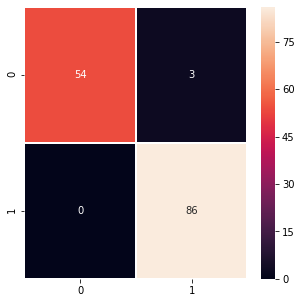

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns
f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True,linewidth = 1,fmt =".0f",ax = ax)

AUC: 0.997


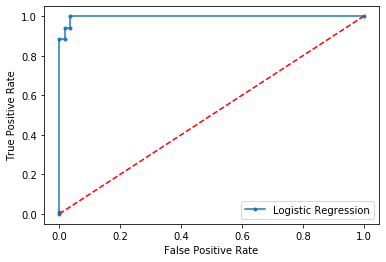

In [210]:
from sklearn import metrics
probs = pen_logreg.predict_proba(x_test)
preds = probs[:,1]


#fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds)
#lr_fpr, lr_tpr, thresholds = metrics.roc_curve(y_test, preds)
# calculate AUC
auc = metrics.roc_auc_score(y_test, preds)
print('AUC: %.3f' % auc)

#pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic Regression')
plt.plot([0, 1], [0, 1],'r--')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [176]:
pen_logreg_pipe = make_pipeline(StandardScaler(), LogisticRegression(penalty='l1'))
#print(pen_logreg_pipe.steps) 
# Name of step = 'logisticregression' + __ + C

pen_logreg_param_grid = {'logisticregression__C': np.linspace(1, 100, 100)}
pen_logreg_grid = GridSearchCV(pen_logreg_pipe, pen_logreg_param_grid).fit(x_train, y_train)

print("PENLIZED LOGISTIC REGRESSION (SCALED DATA)")
print("Test set Score: {:.2f}".format(pen_logreg_grid.score(x_test, y_test)))
print("Best Parameter: {}".format(pen_logreg_grid.best_params_))

PENLIZED LOGISTIC REGRESSION (SCALED DATA)
Test set Score: 0.98
Best Parameter: {'logisticregression__C': 1.0}


## KNN using k fold cross validation

In [181]:
from sklearn.neighbors import KNeighborsClassifier
# Notice that I'm using a Classifier here (as opposed to the Regressor we used in PART 1)

knn = KNeighborsClassifier().fit(x_train, y_train)

print("KNN CLASSIFER (SCALED DATA)")
print("Training set score: {:.3f}".format(knn.score(x_train, y_train)))
print("Test set score: {:.3f}".format(knn.score(x_test, y_test)))

# Kfold Cross Validation
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(knn, x_train, y_train, cv=kfold))))

# Wine type prediction from test set (I'll use this later)
y_pred = knn.predict(x_test)

KNN CLASSIFER (SCALED DATA)
Training set score: 0.972
Test set score: 0.958
Mean Cross Validation, KFold: 0.951


In [182]:
knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())

knn_param_grid = {'kneighborsclassifier__n_neighbors': range(1, 10)}
knn_grid = GridSearchCV(knn_pipe, knn_param_grid).fit(x_train, y_train)

print("KNN for REGRESSION (SCALED DATA)")
print("Test set Score: {:.3f}".format(knn_grid.score(x_test, y_test)))
print("Best Parameter: {}".format(knn_grid.best_params_))

KNN for REGRESSION (SCALED DATA)
Test set Score: 0.972
Best Parameter: {'kneighborsclassifier__n_neighbors': 7}


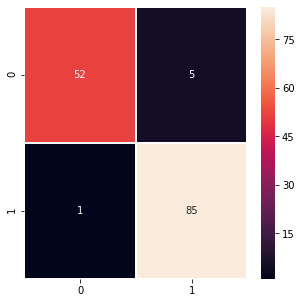

In [192]:
y_pred = knn.predict(x_test) #Predict data for eveluating 
cm = confusion_matrix(y_true,y_pred)
f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True,linewidth = 1,fmt =".0f",ax = ax)

AUC: 0.992


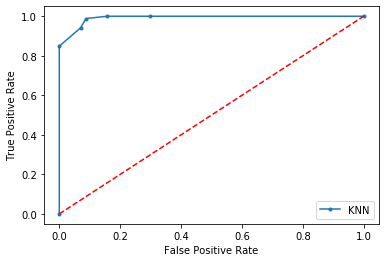

In [208]:
from sklearn import metrics
probs = knn.predict_proba(x_test)
preds = probs[:,1]


#fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds)
#lr_fpr, lr_tpr, thresholds = metrics.roc_curve(y_test, preds)
# calculate AUC
auc = metrics.roc_auc_score(y_test, preds)
print('AUC: %.3f' % auc)

#pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='KNN')
plt.plot([0, 1], [0, 1],'r--')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()